In [47]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


def gray2binary(image, threshold):
    idx1 = image <= threshold
    idx2 = image >= threshold
    image[idx1] = 0
    image[idx2] = 1.0
    return image

def reducedata(x, y):
    idx = (y < 3) | (y == 4)
    x = x[idx,:,:]
    y = y[idx]
    y[y == 4] = 3
    return x, y

In [1]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 8s 1us/step
Epoch 1/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.2184 - acc: 0.9350
Epoch 2/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0962 - acc: 0.9705
Epoch 3/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.0677 - acc: 0.9779
Epoch 4/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.0547 - acc: 0.9824
Epoch 5/5
10000/10000 [==============================] - 0s 38us/step


[0.06721055440052878, 0.9803]

In [48]:
x_train_b, y_train_b = reducedata(x_train, y_train)
x_test_b, y_test_b = reducedata(x_test, y_test)

x_train_b = gray2binary(x_train_b, 0.5)
x_test_b = gray2binary(x_test_b, 0.5)

model_b = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])
model_b.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_b.fit(x_train_b, y_train_b, epochs=5)
model_b.evaluate(x_test_b, y_test_b)

Epoch 1/5
24465/24465 [==============================] - 3s 143us/step - loss: 0.0740 - acc: 0.9769
Epoch 2/5
24465/24465 [==============================] - 3s 133us/step - loss: 0.0271 - acc: 0.9914
Epoch 3/5
24465/24465 [==============================] - 3s 115us/step - loss: 0.0154 - acc: 0.9951
Epoch 4/5
24465/24465 [==============================] - 3s 118us/step - loss: 0.0093 - acc: 0.9968
Epoch 5/5
4129/4129 [==============================] - 0s 52us/step


[0.02966553982634775, 0.9907968031000243]

In [49]:
print(x_test_b.shape, len(y_test_b))

(4129, 28, 28) 4129


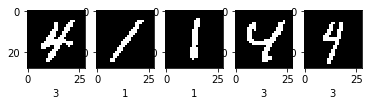

In [53]:
import random
import matplotlib.pyplot as plt

for i in range(5):

    j = random.randint(0, len(y_test_b))
    pic = x_test_b[j, :, :]

    plt.subplot(1, 5, i + 1)
    plt.imshow(pic, cmap='gray')
    plt.xlabel(y_test_b[j])
    
plt.show()

In [55]:
from helper import *

gc = 127
nh = int(24 * (28 / 24))
nw = int(32 * (28 / 24) + 0.5) + 1
print(nh, nw)

samples = load_image("./test", nh, nw)
n = len(samples)

x_real = preprocess(samples, 5, 127)
y_real = [1, 1, 1, 1, 3, 0, 1, 2]

print(model_b.evaluate(x_real, y_real))

y_pred = model_b.predict(x_real).argmax(1)
y_label = y_pred
y_label[y_pred == 3] = 4
print(y_pred)

28 38


/Users/wuyan/anaconda2/envs/py3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/wuyan/anaconda2/envs/py3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


8/8 [==============================] - 0s 155us/step
[2.8704614639282227, 0.5]
[2 2 4 2 4 0 1 2]


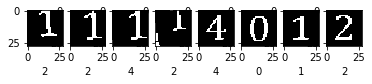

In [56]:
for i in range(n):
    plt.subplot(1, n, i + 1)

    pic = x_real[i,:,:]
    
    plt.imshow(pic, cmap='gray')
    plt.xlabel(str(y_label[i]))
    
plt.show()

[1, 1, 1, 1, 4, 0, 1, 2]

[ True False False False  True  True  True False False  True]
[2 0 4 2 1]


8 28 38 3
